In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-precond-gmres)

Here is a random nonsymmetric matrix.

In [2]:
import scipy.sparse as sp
n = 8000
A = 2.8 * sp.eye(n) + sp.rand(n, n, 0.002)

Without a preconditioner, GMRES can solve a system with this matrix.

In [3]:
from scipy.sparse.linalg import gmres

b = random.rand(n)
hist = lambda rvec: resid.append(norm(rvec))
resid = [1.]

start = timer()
x, flag = gmres(A, b, maxiter=300, rtol=1e-10, restart=50, callback=hist)
print(f"time for plain GMRES: {timer() - start:.3f} sec")
resid_plain = resid.copy()

time for plain GMRES: 0.043 sec


```{index} ! Python; spilu
```

The following version of incomplete LU factorization drops all sufficiently small values (i.e., replaces them with zeros). This keeps the number of nonzeros in the factors under control.

In [4]:
from scipy.sparse.linalg import spilu
iLU = spilu(A, drop_tol=0.2)
print(f"Factors have {iLU.nnz} nonzeros, while A has {A.nnz}")

/var/folders/gc/0752xrm56pnf0r0dsrn5370c0000gr/T/ipykernel_16463/769705972.py:2: SparseEfficiencyWarning: spilu converted its input to CSC format
  iLU = spilu(A, drop_tol=0.2)


Factors have 90808 nonzeros, while A has 135982


The result is not a true factorization of the original matrix. However, it's close enough for an approximate inverse in a preconditioner.

In [5]:
from scipy.sparse.linalg import LinearOperator
prec = LinearOperator((n, n), matvec=lambda y: iLU.solve(y))

resid = [1.];  start = timer()
x, flag = gmres(A, b, M=prec, maxiter=300, rtol=1e-10, restart=50, callback=hist)
print(f"time for preconditioned GMRES: {timer() - start:.3f} sec")
resid_prec = resid

time for preconditioned GMRES: 0.031 sec


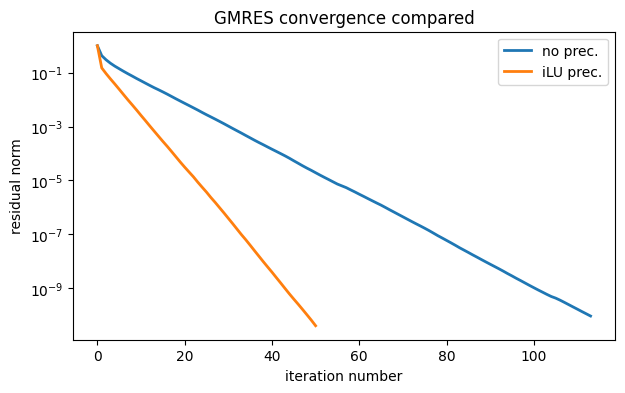

In [6]:
semilogy(resid_plain, label="no prec.")
semilogy(resid_prec, label="iLU prec.")
xlabel("iteration number"),  ylabel("residual norm")
legend()
title("GMRES convergence compared");